# Week 5

# Getting Started with Pandas (Part 2)
# Data Analysis with Data Frames

In this week, we will look into a data set about movies and use data frames to perform data analysis.

In [1]:
import pandas as pd

## 1. Download and extract MovieLens data

- [MovieLens](https://grouplens.org/datasets/movielens/) is a web-based recommender system and virtual community that recommends movies for its users to watch, based on their file preferences using collaborative filtering of members' movie ratings and movie reviews. 
- We will look at its `ml-latest-small` dataset.

In [3]:
# Download ml-latest-small.zip from https://grouplens.org/datasets/movielens/
import os 
import urllib.request
url = "http://files.grouplens.org/datasets/movielens/ml-latest-small.zip"
file_path = "Data/"
zip_file = "ml-latest-small.zip"

# Create the Data folder if it doesn't already exist.
if not os.path.isfile(file_path):
    os.mkdir(file_path)

# Download file
urllib.request.urlretrieve(url, file_path + zip_file)

('Data/ml-latest-small.zip', <http.client.HTTPMessage at 0x28b7a16ea90>)

In [4]:
# Decompress the zip file
import zipfile
f = zipfile.ZipFile(file_path + zip_file, "r")
f.printdir()
f.extractall(file_path)
f.close()

File Name                                             Modified             Size
ml-latest-small/                               2018-09-26 15:50:12            0
ml-latest-small/links.csv                      2018-09-26 15:50:10       197979
ml-latest-small/tags.csv                       2018-09-26 15:49:40       118660
ml-latest-small/ratings.csv                    2018-09-26 15:49:38      2483723
ml-latest-small/README.txt                     2018-09-26 15:50:12         8342
ml-latest-small/movies.csv                     2018-09-26 15:49:56       494431


In [8]:
# Check that files has been unzipped
print(os.listdir(file_path + "ml-latest-small"))

['links.csv', 'movies.csv', 'ratings.csv', 'README.txt', 'tags.csv']


In [9]:
# Delete the zip file
os.remove(file_path + zip_file)
os.listdir(file_path)

['ml-latest-small']

In [10]:
# Write a function to download and decompress file
import os
import urllib.request
import zipfile

def get_movielens(file_path, file_name, delete_zip_file=False):
    url = "http://files.grouplens.org/datasets/movielens/" + file_name
    if not os.path.exists(file_path + file_name):
        urllib.request.urlretrieve(url, file_path + file_name)
        print("File", file_name, "downloaded.")
    with zipfile.ZipFile(file_path + file_name, "r") as f:
        f.extractall(file_path)
        print("Files extracted:")
        print(f.printdir())
    if delete_zip_file:
        os.remove(file_path + file_name)

In [11]:
get_movielens(file_path, zip_file)

File ml-latest-small.zip downloaded.
Files extracted:
File Name                                             Modified             Size
ml-latest-small/                               2018-09-26 15:50:12            0
ml-latest-small/links.csv                      2018-09-26 15:50:10       197979
ml-latest-small/tags.csv                       2018-09-26 15:49:40       118660
ml-latest-small/ratings.csv                    2018-09-26 15:49:38      2483723
ml-latest-small/README.txt                     2018-09-26 15:50:12         8342
ml-latest-small/movies.csv                     2018-09-26 15:49:56       494431
None


## 2. Load ratings data as a pandas DataFrame
- Load csv file as a DataFrame
- head()
- shape, columns, dtypes
- indexing with loc[]
- Handle date and time data
- Data transformation with apply()

In [12]:
import pandas as pd
ratings_df = pd.read_csv("Data/ml-latest-small/ratings.csv",
                         sep=",")
ratings_df.head()  # Show the first several rows of the dataset

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [13]:
# Display the shape of data



In [14]:
# Display the types of each feature



In [15]:
# Convert time stamp to a readable format
from datetime import datetime

# Example: convert the first time stamp
timestamp = ratings_df.loc[0, "timestamp"]
print(timestamp)

dt = datetime.fromtimestamp(timestamp)
print(dt)

ratings_df.loc[0, "Year"] = dt.year
ratings_df.loc[0, "Month"] = dt.month
ratings_df.loc[0, "Day"] = dt.day
ratings_df.loc[0, "Hour"] = dt.hour
ratings_df.loc[0, "Minute"] = dt.minute
ratings_df.loc[0, "Second"] = dt.second
ratings_df.head()

964982703
2000-07-30 14:45:03


,userId,movieId,rating,timestamp,Year,Month,Day,Hour,Minute,Second
0,1,1,4.0,964982703,2000.0,7.0,30.0,14.0,45.0,3.0
1,1,3,4.0,964981247,NaN,NaN,NaN,NaN,NaN,NaN
2,1,6,4.0,964982224,NaN,NaN,NaN,NaN,NaN,NaN
3,1,47,5.0,964983815,NaN,NaN,NaN,NaN,NaN,NaN
4,1,50,5.0,964982931,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Use apply() to apply a function to all rows
ratings_df["DT"] = ratings_df["timestamp"].apply(datetime.fromtimestamp)
ratings_df.head()

,userId,movieId,rating,timestamp,Year,Month,Day,Hour,Minute,Second,DT
0,1,1,4.0,964982703,2000.0,7.0,30.0,14.0,45.0,3.0,2000-07-30 14:45:03
1,1,3,4.0,964981247,NaN,NaN,NaN,NaN,NaN,NaN,2000-07-30 14:20:47
2,1,6,4.0,964982224,NaN,NaN,NaN,NaN,NaN,NaN,2000-07-30 14:37:04
3,1,47,5.0,964983815,NaN,NaN,NaN,NaN,NaN,NaN,2000-07-30 15:03:35
4,1,50,5.0,964982931,NaN,NaN,NaN,NaN,NaN,NaN,2000-07-30 14:48:51


We can also create functions to fill column year, month, ...

In [18]:
# Ex: Fill the year column



## 3. Save the processed ratings data

Data can be saved in many different formats. Today we will save the processed rating data as a new CSV file.

In [19]:
# Save the processed data as a .csv file
csv_file = "Data/ml-latest-small/ratings_processed.csv"
ratings_df.to_csv(csv_file)

In [20]:
# Ex: Load the new file and display its first 5 rows.



## 4. Analyzing MovieLens Data
- Distribution of movie ratings
- Popular movies

In [21]:
# Use value_counts() to find the rating frequencies
rating_frequencies = ratings_df['rating'].value_counts()
print(rating_frequencies)

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64


In [23]:
# Find sorted the rating frequencies
rating_frequencies = ratings_df['rating'].value_counts().sort_index()
print(rating_frequencies)

0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: rating, dtype: int64


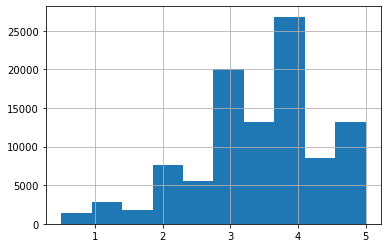

In [25]:
# Visualize rating frequencies
ratings_df['rating'].hist()

In [ ]:
# Which years were these ratings created?



In [ ]:
# How are rating frequencies distributed in 2018?



In [ ]:
# How are rating frequencies distributed in 2003?



Next, let's identify some popular movies.

In [ ]:
# Which movie received the highest number of ratings?



In [26]:
# What is the name of the movie? (The answer requires another data file.)



In [27]:
# Which movie receives the largest amount of 5.0?



In [28]:
# Find the name of this movie



In [29]:
# Which movie has the highest average rating?



In [30]:
# Find the top ten highest-rated movies.

